In [3]:
%pip install scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ERROR: Error while checking for conflicts. Please file an issue on pip's issue tracker: https://github.com/pypa/pip/issues/new
Traceback (most recent call last):
  File "C:\Users\Kelvin\anaconda3\Lib\site-packages\pip\_internal\commands\install.py", line 584, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Kelvin\anaconda3\Lib\site-packages\pip\_internal\operations\check.py", line 117, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Kelvin\anaconda3\Lib\site-packages\pip\_internal\operations\check.py", line 59, in create_package_set_from_installed
    package_set[name] = PackageDetails(dist.version, dependencies)
                                       ^^^^^^^^^^^^
  File "C:\Users\Kelvin\anaconda3\Lib\site-packages\pip\_internal\metadata\importlib\_dists.py", line 168, in version
    return p

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.datasets import load_iris

# Load iris dataset from sklearn
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [5]:
df.drop(columns=[col for col in df.columns if "unnamed" in col], inplace=True)

print("\nMissing values:")
print(df.isnull().sum())


Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [6]:
# check for duplicates
print("\nDuplicates rows", df.duplicated().sum())
df = df.drop_duplicates()



Duplicates rows 1


In [7]:
# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')   

In [8]:
# Add species names as a new column
df['species'] = pd.Categorical.from_codes(df['target'], iris.target_names)

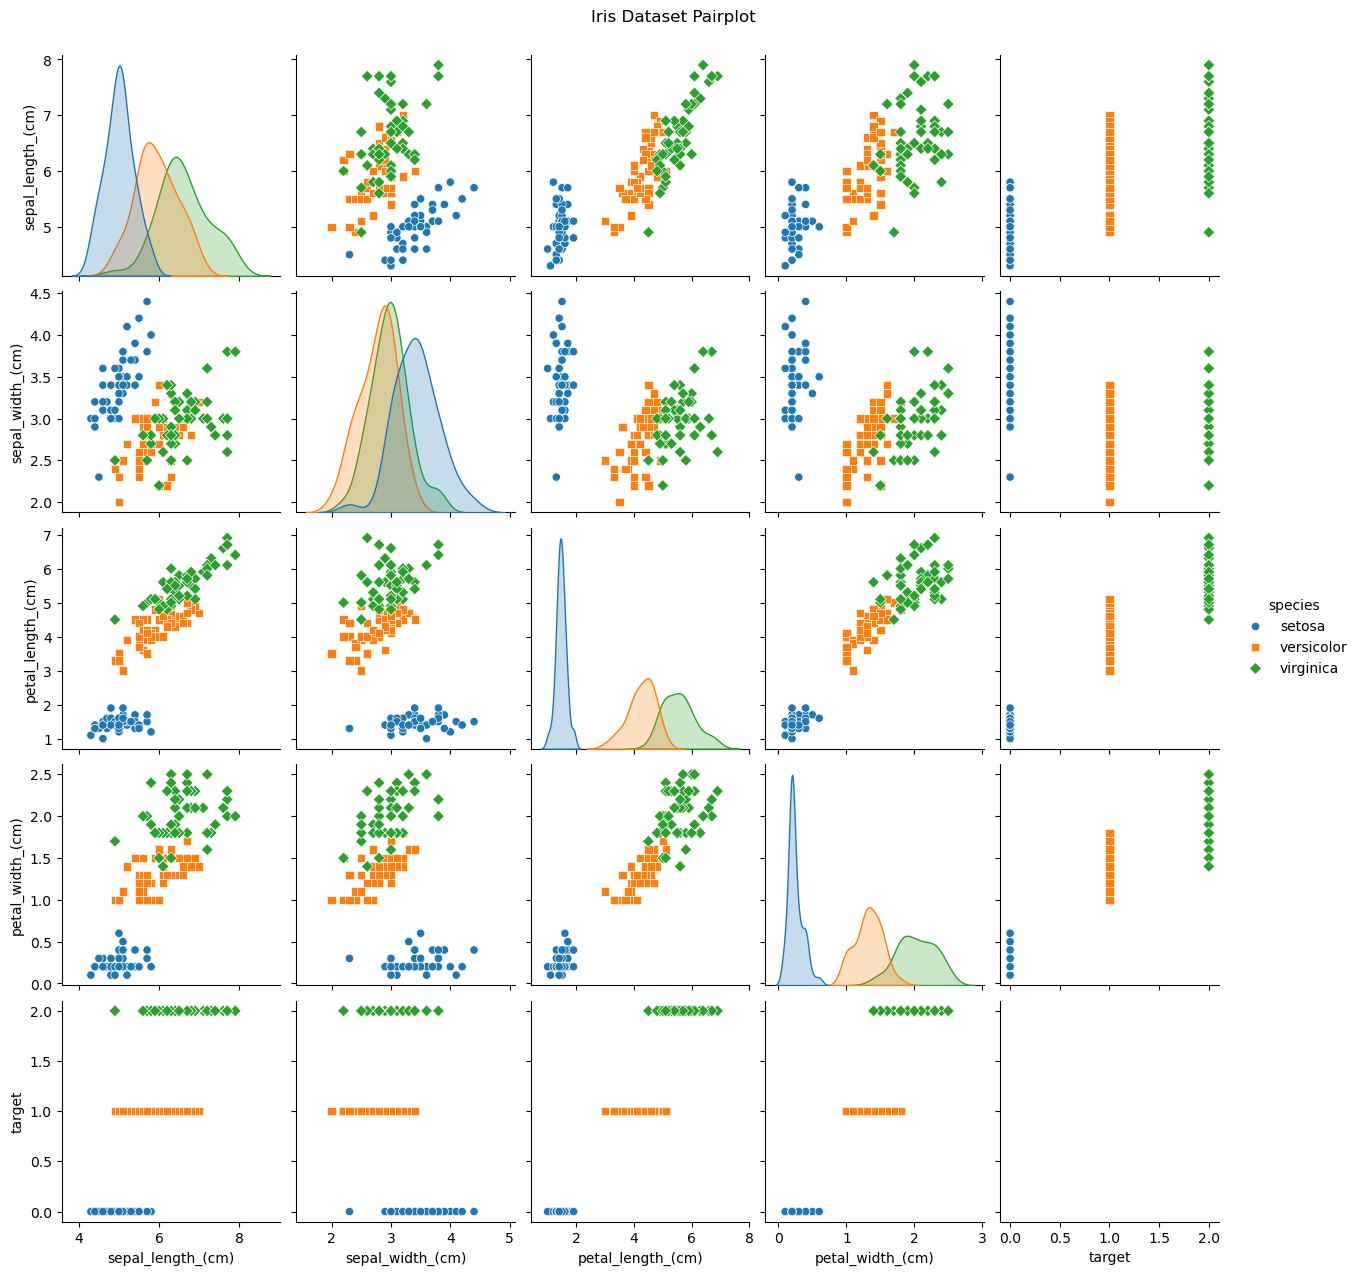

In [9]:
#pairplot
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Iris Dataset Pairplot", y=1.02)
plt.show()

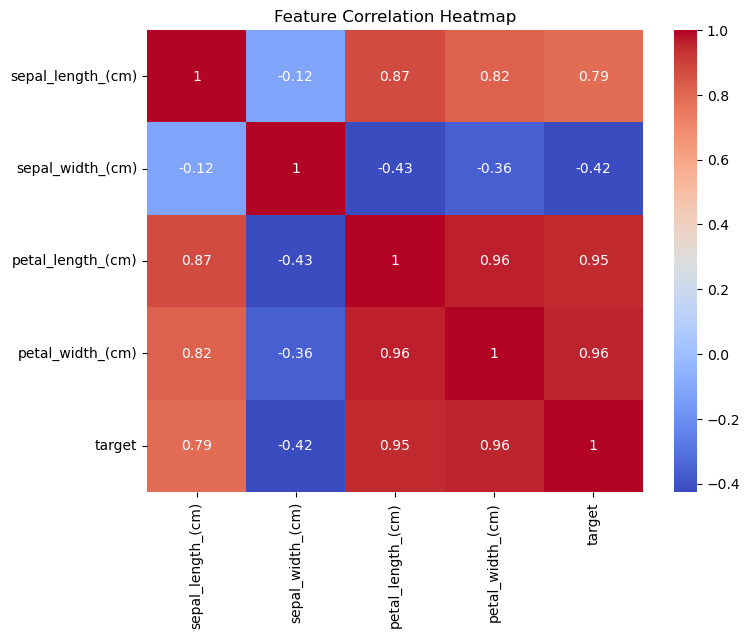

In [17]:
# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
# Features and labels
x = df.drop(columns=['species', 'target'])
y = df['target']

# split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)  

In [ ]:
#evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))